In [19]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing libraries data visualisation & exploratory data analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing libraries data loading
import json
from pandas.io.json import json_normalize

# Importing libraries for text data pre-processing
import re, string
import nltk, spacy
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

# Importing libraries for vectorization & topic modelling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from gensim.models.coherencemodel import CoherenceModel
from operator import itemgetter


# Importing libraries for supervised model training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# Importing algorithms for performing hyper-parameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Importing various performance metrics for performance analysis of algorithms
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import itertools

# For ignoring the warnings
import warnings
warnings. filterwarnings("ignore")

In [20]:
# Loading the json file
client_json = open('/content/drive/MyDrive/Assignment1/Assignment1/Client_data.json',)

# Returning a json object so that it can be converted into a dataframe in next step
client_data = json.load(client_json)

In [21]:
# Creating a dataframe from the json object
ticket_system = json_normalize(client_data)

# Viewing first 5 rows of the dataset
ticket_system.head()

,_index,_type,_id,_score,_source.tags,_source.zip_code,_source.complaint_id,_source.issue,_source.date_received,_source.state,...,_source.company_response,_source.company,_source.submitted_via,_source.date_sent_to_company,_source.company_public_response,_source.sub_product,_source.timely,_source.complaint_what_happened,_source.sub_issue,_source.consumer_consent_provided
0,complaint-public-v2,complaint,3211475,0.0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,complaint-public-v2,complaint,2673060,0.0,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,complaint-public-v2,complaint,3203545,0.0,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [22]:
# Basic information about dataset
ticket_system.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object 
 11  _source.product                    78313 non-null  obj

In [23]:
# Statistical summary of the numerical features
ticket_system.describe()

,_score
count,78313.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [24]:
# Replacing blank in '_source.complaint_what_happened' feature with NaN values
ticket_system['_source.complaint_what_happened'].replace("", np.nan, inplace = True)

In [25]:
# Finding out the null values in each feature of the dataset
ticket_system.isnull().sum()

_index                                   0
_type                                    0
_id                                      0
_score                                   0
_source.tags                         67413
_source.zip_code                      6757
_source.complaint_id                     0
_source.issue                            0
_source.date_received                    0
_source.state                         1991
_source.consumer_disputed                0
_source.product                          0
_source.company_response                 0
_source.company                          0
_source.submitted_via                    0
_source.date_sent_to_company             0
_source.company_public_response      78309
_source.sub_product                  10571
_source.timely                           0
_source.complaint_what_happened      57241
_source.sub_issue                    46297
_source.consumer_consent_provided     1008
dtype: int64

In [26]:
# Calculating the percentage of null values in each features
ticket_system_null_value_percentage = round(ticket_system.isna().sum() * 100 / 78313, 2)
ticket_system_null_value_percentage

_index                                0.00
_type                                 0.00
_id                                   0.00
_score                                0.00
_source.tags                         86.08
_source.zip_code                      8.63
_source.complaint_id                  0.00
_source.issue                         0.00
_source.date_received                 0.00
_source.state                         2.54
_source.consumer_disputed             0.00
_source.product                       0.00
_source.company_response              0.00
_source.company                       0.00
_source.submitted_via                 0.00
_source.date_sent_to_company          0.00
_source.company_public_response      99.99
_source.sub_product                  13.50
_source.timely                        0.00
_source.complaint_what_happened      73.09
_source.sub_issue                    59.12
_source.consumer_consent_provided     1.29
dtype: float64

In [27]:
# Dropping rows having null values in '_source.complaint_what_happened' feature
ticket_system.dropna(subset=['_source.complaint_what_happened'], inplace = True)

In [28]:
# Viewing the shape of the dataset after dropping rows
ticket_system.shape

(21072, 22)

In [29]:
# Removing '_' from each features
ticket_system.columns = [re.sub('^_','',col) for col in ticket_system.columns]

# Removing 'source' from each features
ticket_system.columns = [re.sub(r"^\bsource\b\.", "", col) for col in ticket_system.columns]

In [30]:
# Viewing first five rows of dataset after renaming the columns
ticket_system.head()

,index,type,id,score,tags,zip_code,complaint_id,issue,date_received,state,...,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
1,complaint-public-v2,complaint,3229299,0.0,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,complaint-public-v2,complaint,3199379,0.0,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
10,complaint-public-v2,complaint,3233499,0.0,None,104XX,3233499,Incorrect information on your report,2019-05-06T12:00:00-05:00,NY,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-06T12:00:00-05:00,None,Other personal consumer report,Yes,Chase Card was reported on XX/XX/2019. However...,Information belongs to someone else,Consent provided
11,complaint-public-v2,complaint,3180294,0.0,None,750XX,3180294,Incorrect information on your report,2019-03-14T12:00:00-05:00,TX,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-03-15T12:00:00-05:00,None,Credit reporting,Yes,"On XX/XX/2018, while trying to book a XXXX XX...",Information belongs to someone else,Consent provided
14,complaint-public-v2,complaint,3224980,0.0,None,920XX,3224980,Managing an account,2019-04-27T12:00:00-05:00,CA,...,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-27T12:00:00-05:00,None,Checking account,Yes,my grand son give me check for {$1600.00} i de...,Funds not handled or disbursed as instructed,Consent provided


In [14]:
# Custom method for performing basic text pre-processing functionalities
def text_cleaning_operation(document):
    document = document.lower()
    document = re.sub(r'\[.*?\]','',document)
    
    document = re.sub(r'[%s]%re.escape(string.punctuation)','',document)
    document = re.sub(r'\w*\d\w*', '', document)
    
    return document

In [31]:
nlp = spacy.load("en_core_web_sm")

# Custom method for performing lemmatization in our dataset
def lemmatize_document(corpus):
    ticket_lemma = []
    document = nlp(corpus)
    for word in document:
        ticket_lemma.append(word.lemma_)
    
    return " ".join(ticket_lemma)

In [32]:
# Applying text pre-processing in the feature
ticket_system['complaint_what_happened'] = ticket_system['complaint_what_happened'].apply(lambda text: text_cleaning_operation(text))

In [33]:
# Applying lemmatization on the feature and creating a new column with lemmatized complaints
ticket_system['complaint'] = ticket_system.apply(lambda text: lemmatize_document(text['complaint_what_happened']), axis=1)

In [34]:
# Creating a new dataframe with cleaned and pre-processed features
ticket_system_pre_processed = ticket_system[['complaint_what_happened', 'complaint']]
ticket_system_pre_processed.head()

,complaint_what_happened,complaint
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr..."
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ..."
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...


In [35]:
# Custom method for extracting POS-Noun tags
def extract_singular_noun(text):
    text_blob = TextBlob(text)
    return ' '.join([ word for (word,tag) in text_blob.tags if tag == "NN"])

In [37]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [38]:
# Creating a new column containing only singular nouns from the complaint feature using custom method declare above.
ticket_system_pre_processed['complaint_POS'] = ticket_system_pre_processed.apply(lambda text: extract_singular_noun(text['complaint']), axis=1)
ticket_system_pre_processed.head()

,complaint_what_happened,complaint,complaint_POS
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember ask debt ver...
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,card agent upgrade date agent information orde...
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",card application identity consent service cred...
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",try book xxxx ticket offer ticket card informa...
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund bank account pay money ...


In [39]:
# Creating Document term matrix which is a tuple.
# Removing infrequent words having less than 2 appearance in the complaint (min_df)
tfidf_matrix = TfidfVectorizer(max_df=0.95,min_df=2,stop_words='english')
document_matrix = tfidf_matrix.fit_transform(ticket_system_pre_processed['complaint_POS'])

In [41]:
!python -m pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
     |████████████████████████████████| 67 kB 5.2 MB/s 
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=368d85b74bae6113c7e022b7f00a00ae0204a443fad5fe662d13a3b4e778ecc9
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=d9c8f89137598c5450bab8a6d51c5d4667735d79f7fb5a562f93bc90846b2e70
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [43]:
# Extracting best num of topics via coherence score
document = ticket_system_pre_processed['complaint_POS']
corpus = [text.split() for text in document]

In [44]:
doc_dict = Dictionary(corpus)
doc_dict.filter_extremes(no_below=3, no_above=0.85, keep_n=5000)

In [45]:
corpus_bow = [doc_dict.doc2bow(text) for text in corpus]

In [46]:
topic_num = list(np.arange(2, 10, 1))
coherence_score = []

In [48]:
# Running nmf model and calculating coherence score
for num in topic_num:
    nmf = Nmf(
        corpus = corpus_bow,
        num_topics = num,
        id2word= doc_dict,
        chunksize = 2000,
        passes = 5,
        kappa = .1,
        minimum_probability = 0.01,
        w_max_iter = 300,
        w_stop_condition = 0.0001,
        h_max_iter = 100,
        h_stop_condition = 0.001,
        eval_every = 10,
        normalize = True,
        random_state = 40
    )
    
    coherence_model = CoherenceModel(
        model = nmf,
        texts = document,
        dictionary = doc_dict,
        coherence = 'c_v'
    )
    
    coherence_score.append(round(coherence_model.get_coherence(), 5))

In [ ]:
# Get number of topics with highest coherence score
scores = list(zip(topic_num, coherence_score))
best_topics_num = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

In [51]:
nmf_model = NMF(n_components = 5,random_state = 40)
nmf_model.fit(document_matrix)

NMF(n_components=5, random_state=40)

In [52]:
# Visualising top words of a component
top_word = nmf_model.components_[0]
top_word.argsort()

top_word_index = top_word.argsort()[-10:]
for index in top_word_index:
  print(tfidf_matrix.get_feature_names()[index])

array([3550, 4264, 4260, ..., 1046,  537,   46])

day
branch
xxxx
deposit
chase
fund
money
check
bank
account


In [54]:
topic_outcome = nmf_model.transform(document_matrix)
topic_outcome[0].round(2)
topic_outcome[0].argmax()
topic_outcome.argmax(axis = 1)

array([0.02, 0.01, 0.02, 0.  , 0.01])

0

array([0, 3, 1, ..., 3, 4, 4])

In [55]:
# Creating a new feature in the dataset with topics for each complaints
ticket_system_pre_processed['Topic'] = topic_outcome.argmax(axis = 1)

In [56]:
ticket_system_pre_processed.shape

(21072, 4)

In [57]:
ticket_system_pre_processed.head()

,complaint_what_happened,complaint,complaint_POS,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember ask debt ver...,0
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,card agent upgrade date agent information orde...,3
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",card application identity consent service cred...,1
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",try book xxxx ticket offer ticket card informa...,1
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund bank account pay money ...,0


In [58]:
# Extracting top 5 complaints for each topics
ticket_system_pre_processed_top_complaint = ticket_system_pre_processed.groupby('Topic').head()
ticket_system_pre_processed_top_complaint.sort_values('Topic')

,complaint_what_happened,complaint,complaint_POS,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember ask debt ver...,0
24,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xx...,mishandle account auto xxxx,0
17,with out notice j.p. morgan chase restricted m...,with out notice j.p . morgan chase restrict my...,j.p restrict account debit card tuesday branch...,0
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund bank account pay money ...,0
27,i opened an account with chase bank on xxxx an...,I open an account with chase bank on xxxx and ...,account bank code bonus term everything accoun...,0
15,can you please remove inquiry,can you please remove inquiry,inquiry,1
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",card application identity consent service cred...,1
23,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,chase credit card datum credit report company ...,1
26,i have reached out to xxxx several times in at...,I have reach out to xxxx several time in attem...,time attempt inquiry creditor place inquiry re...,1
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",try book xxxx ticket offer ticket card informa...,1


In [59]:
# Creating mapping of topics as per the problem statement
ticket_system_pre_processed.replace({'Topic':{0:"Banking Services",
                                              1:"Card",
                                              2:"Others",
                                              3:"Fraudulent Reporting",
                                              4:"Loans"}}, inplace = True)

In [60]:
ticket_system_pre_processed.head()

,complaint_what_happened,complaint,complaint_POS,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember ask debt ver...,Banking Services
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,card agent upgrade date agent information orde...,Fraudulent Reporting
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",card application identity consent service cred...,Card
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",try book xxxx ticket offer ticket card informa...,Card
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund bank account pay money ...,Banking Services


In [61]:
ticket_system_pre_processed.tail()

,complaint_what_happened,complaint,complaint_POS,Topic
78303,after being a chase card customer for well ove...,after be a chase card customer for well over a...,card customer decade solicitation credit card ...,Card
78309,"on wednesday, xx/xx/xxxx i called chas, my xxx...","on wednesday , xx / xx / xxxx I call chas , my...",wednesday chas visa credit card provider claim...,Fraudulent Reporting
78310,i am not familiar with xxxx pay and did not un...,I be not familiar with xxxx pay and do not und...,pay risk provide consumer bank app chase year ...,Fraudulent Reporting
78311,i have had flawless credit for yrs. i've had ...,I have have flawless credit for yrs . I 've ...,credit yrs credit card chase freedom xxxx prob...,Loans
78312,roughly + years ago i closed out my accounts w...,roughly + year ago I close out my account with...,year account jp bank xxxx order line credit ac...,Loans


In [62]:
ticket_system_pre_processed.replace({'Topic':{"Banking Services": 0,
                                              "Card": 1,
                                              "Others": 2,
                                              "Fraudulent Reporting": 3,
                                              "Loans": 4}}, inplace = True)

ticket_system_pre_processed.head()

,complaint_what_happened,complaint,complaint_POS,Topic
1,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name stop bank cardmember ask debt ver...,0
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,I upgrade my xxxx xxxx card in xx / xx/ and be...,card agent upgrade date agent information orde...,3
10,"chase card was reported on xx/xx/. however, fr...","chase card be report on xx / xx/. however , fr...",card application identity consent service cred...,1
11,"on xx/xx/, while trying to book a xxxx xxxx ...","on xx / xx/ , while try to book a xxxx xxxx ...",try book xxxx ticket offer ticket card informa...,1
14,my grand son give me check for {$.} i deposit ...,my grand son give I check for { $ . } I deposi...,son chase account fund bank account pay money ...,0


In [63]:
ticket_system_model_training = ticket_system_pre_processed[['complaint_what_happened', 'Topic']]
ticket_system_model_training.head()

,complaint_what_happened,Topic
1,good morning my name is xxxx xxxx and i apprec...,0
2,i upgraded my xxxx xxxx card in xx/xx/ and was...,3
10,"chase card was reported on xx/xx/. however, fr...",1
11,"on xx/xx/, while trying to book a xxxx xxxx ...",1
14,my grand son give me check for {$.} i deposit ...,0


0    5078
3    5073
1    4804
2    3924
4    2193
Name: Topic, dtype: int64

0    0.240983
3    0.240746
1    0.227980
2    0.186219
4    0.104072
Name: Topic, dtype: float64

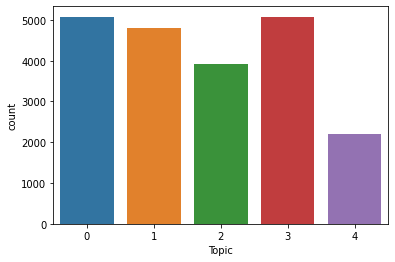

In [64]:
# Finding the frequency of occurance of each values
ticket_system_model_training['Topic'].value_counts()

# Finding the percentage of the frequency of each values
ticket_system_model_training['Topic'].value_counts(normalize = True)

# Visualising the frequency
sns.countplot(x = 'Topic', data = ticket_system_model_training)

***Creating Vector Counts & Transforming word vector to tf-idf***

In [65]:
extract_vector = CountVectorizer()
transform_vector_to_tfidf = extract_vector.fit_transform(ticket_system_model_training['complaint_what_happened'])

In [66]:
import pickle
pickle.dump(extract_vector.vocabulary_, open("/content/drive/MyDrive/Assignment1/Assignment1/count_vector.pkl", "wb"))

In [67]:
transform_vector = TfidfTransformer()
x_train_tfidf = transform_vector.fit_transform(transform_vector_to_tfidf)

In [68]:
pickle.dump(transform_vector, open("/content/drive/MyDrive/Assignment1/Assignment1/tfidf_vector.pkl", "wb"))

**Dataset Preparation for Supervised Model Training**

In [70]:
# Splitting the dataset into training and testing set for supervised model training and evaluation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_tfidf, ticket_system_model_training.Topic, test_size = 0.25, random_state = 47)

In [71]:
# Getting the dataset shapes for each training and testing sets
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((15804, 27984), (15804,))

((5268, 27984), (5268,))

In [79]:
# Custom method for plotting the Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

***Logistic Regression***


In [73]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [76]:
y_pred_log_reg = log_reg.predict(x_test)

In [77]:
accuracy_score(y_test, y_pred_log_reg)

0.9174259681093394

In [78]:
print(classification_report(y_test, y_pred_log_reg))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1286
           1       0.91      0.92      0.92      1233
           2       0.92      0.93      0.92       983
           3       0.90      0.90      0.90      1227
           4       0.95      0.85      0.90       539

    accuracy                           0.92      5268
   macro avg       0.92      0.91      0.92      5268
weighted avg       0.92      0.92      0.92      5268



In [81]:
confussion_matrix = confusion_matrix(y_test, y_pred_log_reg)
np.set_printoptions(precision=2)

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization


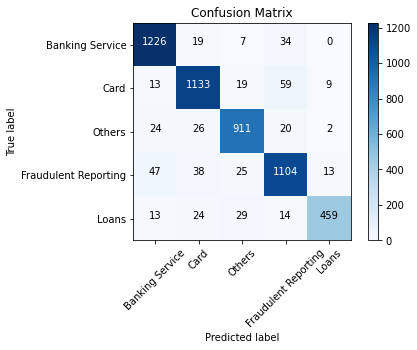

In [83]:
plt.figure()
plot_confusion_matrix(confussion_matrix, classes=['Banking Service', 'Card', 'Others', 'Fraudulent Reporting', 'Loans'], title='Confusion Matrix')

**Logistic Regression - Hyperparameter Tuning**

In [105]:
param_logistic_reg = {"penalty" : ['l2', 'l1', 'elasticnet'],
                     "C" : np.logspace(-3,10,7),}

In [106]:
log_reg_hyper_tuned = GridSearchCV(estimator=log_reg, param_grid=param_logistic_reg, cv=10, n_jobs=-1)

In [107]:
log_reg_hyper_tuned.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00e-03, 1.47e-01, 2.15e+01, 3.16e+03, 4.64e+05, 6.81e+07,
       1.00e+10]),
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [108]:
log_reg_hyper_tuned.best_estimator_

LogisticRegression(C=3162.2776601683795)

In [109]:
log_reg = LogisticRegression(C=3162.2776601683795)
log_reg.fit(x_train, y_train)

LogisticRegression(C=3162.2776601683795)

In [110]:
y_pred_log_reg_hypertuned = log_reg.predict(x_test)

In [111]:
accuracy_score(y_test, y_pred_log_reg_hypertuned)

0.9198936977980258

In [112]:
print(classification_report(y_test, y_pred_log_reg_hypertuned))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1286
           1       0.92      0.93      0.93      1233
           2       0.93      0.94      0.93       983
           3       0.89      0.89      0.89      1227
           4       0.93      0.90      0.91       539

    accuracy                           0.92      5268
   macro avg       0.92      0.92      0.92      5268
weighted avg       0.92      0.92      0.92      5268



In [113]:
confussion_matrix = confusion_matrix(y_test, y_pred_log_reg_hypertuned)
np.set_printoptions(precision=2)

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization


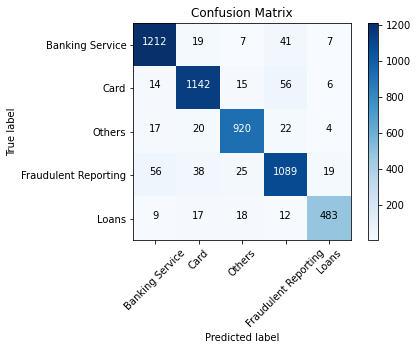

In [114]:
plt.figure()
plot_confusion_matrix(confussion_matrix, classes=['Banking Service', 'Card', 'Others', 'Fraudulent Reporting', 'Loans'], title='Confusion Matrix')

***Random Forest***

In [87]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

RandomForestClassifier()

In [88]:
y_pred_random_forest = random_forest.predict(x_test)

In [89]:
accuracy_score(y_test, y_pred_random_forest)

0.816628701594533

In [90]:
print(classification_report(y_test, y_pred_random_forest))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1286
           1       0.80      0.86      0.83      1233
           2       0.86      0.86      0.86       983
           3       0.79      0.82      0.80      1227
           4       0.95      0.41      0.57       539

    accuracy                           0.82      5268
   macro avg       0.84      0.77      0.78      5268
weighted avg       0.83      0.82      0.81      5268



In [91]:
confussion_matrix = confusion_matrix(y_test, y_pred_random_forest)
np.set_printoptions(precision=2)

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization


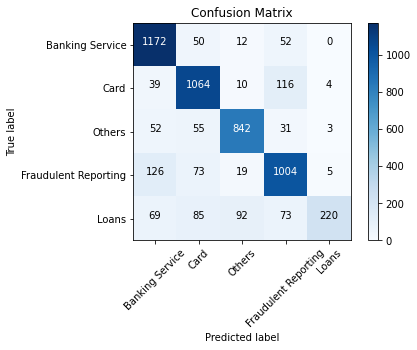

In [92]:
plt.figure()
plot_confusion_matrix(confussion_matrix, classes=['Banking Service', 'Card', 'Others', 'Fraudulent Reporting', 'Loans'], title='Confusion Matrix')

***Random Forest - Hyperparameter Tuning***

In [93]:
param_random_forest_grid = {"n_estimators": [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
             "criterion": ["gini", "entropy"],
             "max_depth": [int(x) for x in np.linspace(5, 30, num=6)],
             "min_samples_split": [2,5,10,15, 100],
             "min_samples_leaf": [1,2,5,10],
             "max_features": ["auto", "sqrt", "log2"]}

In [94]:
random_forest_hypertuned = RandomizedSearchCV(estimator=random_forest, param_distributions=param_random_forest_grid, n_iter=10, n_jobs=1, cv=10, verbose=2)

In [95]:
random_forest_hypertuned.fit(x_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.1s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.0s
[CV] END criterion=entropy, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_spli

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [96]:
random_forest_hypertuned.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=800)

In [97]:
random_forest =  RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=800)

In [98]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_leaf=10, min_samples_split=10,
                       n_estimators=800)

In [99]:
y_pred_random_forest_hypertuned = random_forest.predict(x_test)

In [100]:
accuracy_score(y_test, y_pred_random_forest_hypertuned)

0.7737281700835231

In [101]:
print(classification_report(y_test, y_pred_random_forest_hypertuned))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      1286
           1       0.72      0.85      0.78      1233
           2       0.84      0.80      0.82       983
           3       0.77      0.82      0.79      1227
           4       0.99      0.15      0.26       539

    accuracy                           0.77      5268
   macro avg       0.82      0.70      0.70      5268
weighted avg       0.79      0.77      0.75      5268



In [103]:
confussion_matrix = confusion_matrix(y_test, y_pred_random_forest_hypertuned)
np.set_printoptions(precision=2)

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization


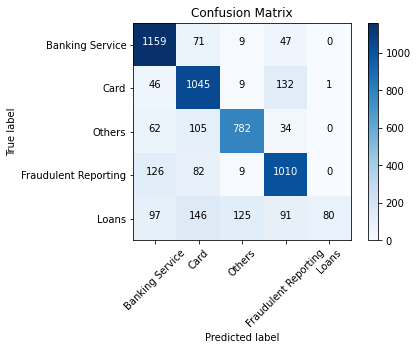

In [104]:
plt.figure()
plot_confusion_matrix(confussion_matrix, classes=['Banking Service', 'Card', 'Others', 'Fraudulent Reporting', 'Loans'], title='Confusion Matrix')

***XGBoost Classifier***

In [115]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [116]:
y_pred_xgb = xgb_classifier.predict(x_test)

In [117]:
accuracy_score(y_test, y_pred_xgb)

0.8866742596810934

In [118]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1286
           1       0.90      0.91      0.90      1233
           2       0.89      0.89      0.89       983
           3       0.87      0.85      0.86      1227
           4       0.89      0.85      0.87       539

    accuracy                           0.89      5268
   macro avg       0.89      0.88      0.88      5268
weighted avg       0.89      0.89      0.89      5268



In [119]:
confussion_matrix = confusion_matrix(y_test, y_pred_xgb)
np.set_printoptions(precision=2)

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization


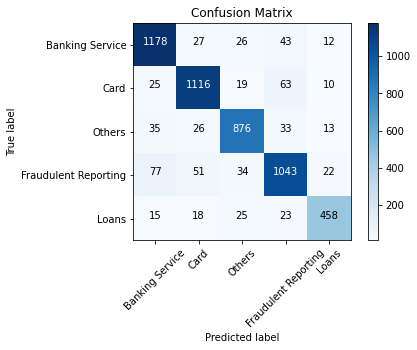

In [125]:
plt.figure()
plot_confusion_matrix(confussion_matrix, classes=['Banking Service', 'Card', 'Others', 'Fraudulent Reporting', 'Loans'], title='Confusion Matrix')